We find m and b so that we can decrease E.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('data.csv')
print(data)

    studytime  score
0         1.3     42
1         4.7     38
2         0.5     15
3         7.2     88
4         2.8     53
5         5.1     62
6         0.1      8
7         9.5     91
8         3.4     47
9         6.0     70
10        1.9     28
11        8.3     83
12        0.7     22
13        5.6     59
14        2.2     35
15        7.8     76
16        4.0     50
17        0.3     12
18        9.0     89
19        3.1     41
20        6.5     68
21        1.5     30
22        8.7     85
23        0.9     25
24        5.3     55
25        2.5     40
26        7.5     79
27        4.5     52
28        0.0      5
29        9.9     97
30        3.8     48
31        6.8     72
32        1.7     33
33        8.0     80
34        0.4     18
35        5.9     65
36        2.9     44
37        7.0     74
38        4.2     51
39        0.6     20
40        9.2     90
41        3.6     45
42        6.3     67
43        1.1     27
44        8.5     84
45        0.8     23
46        5.4

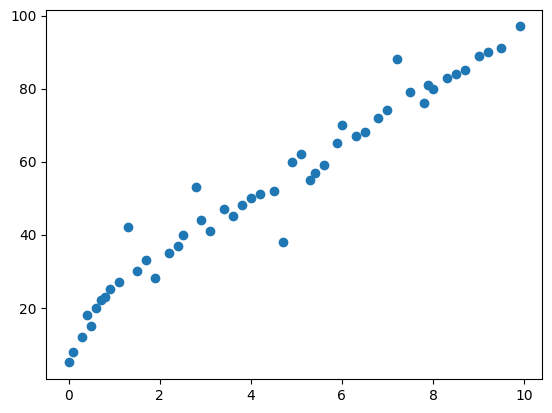

In [15]:
plt.scatter(data.studytime, data.score)
plt.show()

In [21]:
#this is to calculate the loss manually, wont use it

def loss_function(m,b, points): #mse
    total_error =0
    for i in range(len(points)):
        x= points.iloc[i].studytime
        y= points.iloc[i].score
        total_error += (y - (m*x +b))**2
    total_error/float(len(points))


def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    total_loss = 0  # Track MSE for this epoch

    for i in range(n):
        x = points.iloc[i].studytime
        y = points.iloc[i].score
        
        # Gradients
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
        # Loss (MSE component)
        total_loss += (y - (m_now * x + b_now)) ** 2

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    mse = total_loss / n  # Mean Squared Error
    return m, b, mse

In [16]:
data.describe()

,studytime,score
count,50.000000,50.0000
mean,4.444000,52.4200
std,2.987536,25.0714
min,0.000000,5.0000
25%,1.750000,33.5000
50%,4.350000,51.5000
75%,6.950000,73.5000
max,9.900000,97.0000


Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
Epoch: 500
Epoch: 550
Epoch: 600
Epoch: 650
Epoch: 700
Epoch: 750
Epoch: 800
Epoch: 850
Epoch: 900
Epoch: 950
9.443264136929768 8.09986465178203


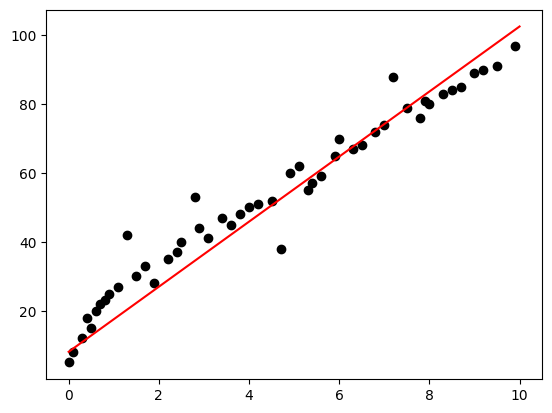

In [19]:
m =0
b =0
L = 0.001
epochs = 1000

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m , b = gradient_descent(m,b, data, L)


print(m,b)

plt.scatter(data.studytime, data.score, color ='black')
plt.plot(list(range(0,11)), [m * x + b for x in range(0,11)], color = 'red')
plt.show()

Epoch 0: MSE = 3363.86, m = 0.06, b = 0.01
Epoch 50: MSE = 1912.37, m = 2.69, b = 0.47
Epoch 100: MSE = 1104.09, m = 4.66, b = 0.82
Epoch 150: MSE = 653.92, m = 6.12, b = 1.10
Epoch 200: MSE = 403.12, m = 7.21, b = 1.31
Epoch 250: MSE = 263.33, m = 8.02, b = 1.48
Epoch 300: MSE = 185.34, m = 8.63, b = 1.62
Epoch 350: MSE = 141.76, m = 9.07, b = 1.74
Epoch 400: MSE = 117.34, m = 9.41, b = 1.83
Epoch 450: MSE = 103.58, m = 9.65, b = 1.91
Epoch 500: MSE = 95.77, m = 9.84, b = 1.98
Epoch 550: MSE = 91.26, m = 9.97, b = 2.05
Epoch 600: MSE = 88.60, m = 10.07, b = 2.11
Epoch 650: MSE = 86.96, m = 10.14, b = 2.16
Epoch 700: MSE = 85.90, m = 10.19, b = 2.21
Epoch 750: MSE = 85.15, m = 10.23, b = 2.26
Epoch 800: MSE = 84.59, m = 10.26, b = 2.30
Epoch 850: MSE = 84.12, m = 10.28, b = 2.35
Epoch 900: MSE = 83.72, m = 10.29, b = 2.39
Epoch 950: MSE = 83.34, m = 10.30, b = 2.43

Final parameters: m = 10.30, b = 2.48


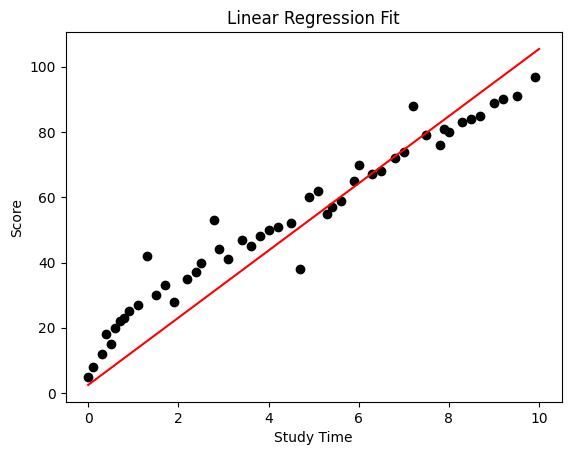

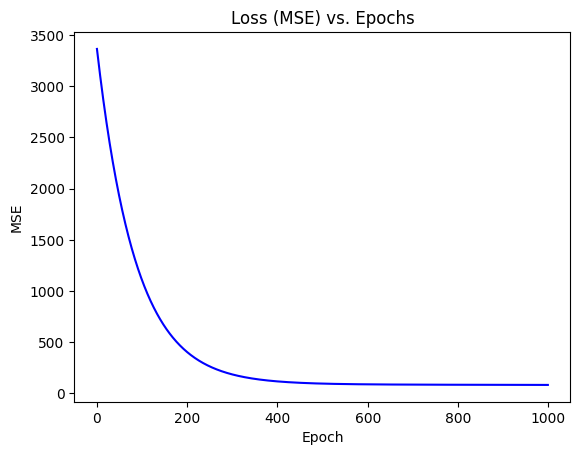

In [ ]:
# Initialize parameters
m = 0
b = 0
L = 0.0001  # Learning rate (try 0.0001, 0.001, 0.01)
epochs = 1000

# Track loss over epochs
loss_history = []

for i in range(epochs):
    m, b, mse = gradient_descent(m, b, data, L)
    loss_history.append(mse)
    
    if i % 50 == 0:
        print(f"Epoch {i}: MSE = {mse:.2f}, m = {m:.2f}, b = {b:.2f}")

# Final output
print(f"\nFinal parameters: m = {m:.2f}, b = {b:.2f}")

# Plot the regression line
plt.scatter(data.studytime, data.score, color='black')
plt.plot(list(range(0, 11)), [m * x + b for x in range(0, 11)], color='red')
plt.title("Linear Regressions Fit")
plt.xlabel("Study Time")
plt.ylabel("Score")
plt.show()

# Plot loss over epochs
plt.plot(range(epochs), loss_history, color='blue')
plt.title("Loss (MSE) vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()